<a href="https://colab.research.google.com/github/hihihahahehe212121/AI/blob/master/Test_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple


Looking in indexes: https://mirror.baidu.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00


In [2]:
# step 2
!pip install paddleocr

In [3]:
# step 3
import os
import cv2
from paddleocr import PPStructure,draw_structure_result,save_structure_res
from PIL import Image
import numpy as np

In [12]:
import sys
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
# import cv2

sys.path.append('/src')
from ocr.normalization import word_normalization, letter_normalization
# from ocr import page, words, characters
from ocr.helpers import implt, resize
from ocr.tfhelpers import Model
# from ocr.datahelpers import idx2char

[2023/11/14 15:13:48] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

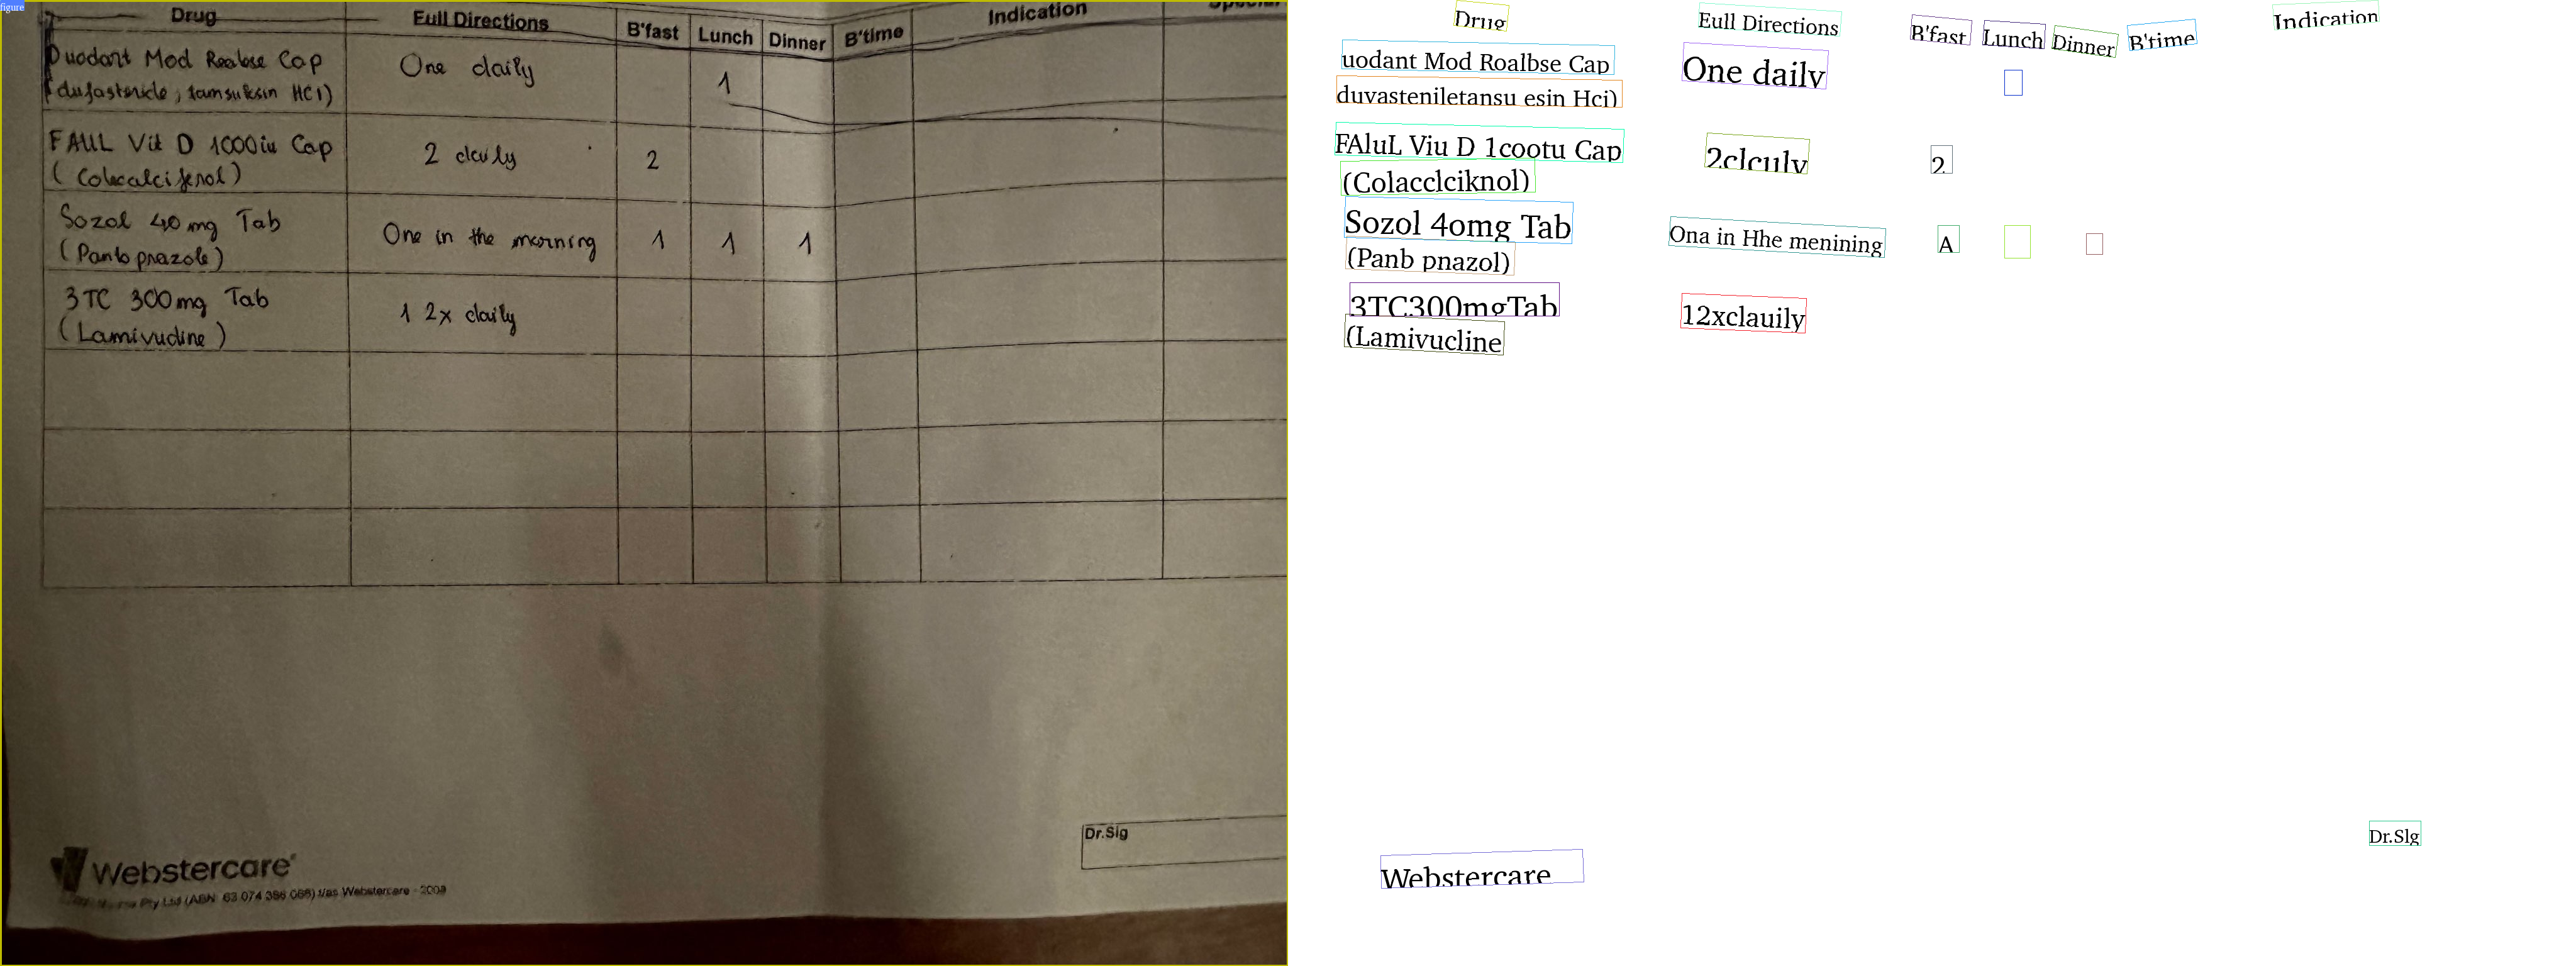

In [6]:
table_engine = PPStructure(show_log=True)

save_folder = './output'
img_path = 'image/test.png'
img = cv2.imread(img_path)
result = table_engine(img)

for line in result:
    line.pop('img')
    print(line)

image = Image.open(img_path).convert('RGB')
im_show = draw_structure_result(image, result, font_path='image/latin.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')
display(im_show)

In [23]:
def recognise(img):
    """Recognition using character model"""
    # Pre-processing the word
    img = word_normalization(
        img,
        60,
        border=False,
        tilt=True,
        hyst_norm=True)
    display(img)
#     # Separate letters
#     img = cv2.copyMakeBorder(
#         img,
#         0, 0, 30, 30,
#         cv2.BORDER_CONSTANT,
#         value=[0, 0, 0])
#     gaps = characters.segment(img, RNN=True)

#     chars = []
#     for i in range(len(gaps)-1):
#         char = img[:, gaps[i]:gaps[i+1]]
#         char, dim = letter_normalization(char, is_thresh=True, dim=True)
#         # TODO Test different values
#         if dim[0] > 4 and dim[1] > 4:
#             chars.append(char.flatten())

#     chars = np.array(chars)
#     word = ''
#     if len(chars) != 0:
#         pred = CHARACTER_MODEL.run(chars)
#         for c in pred:
#             word += idx2char(c)

#     return word

# implt(crop)
# for line in lines:
#     print(" ".join([recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))

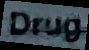

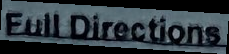

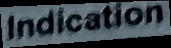

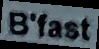

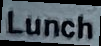

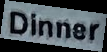

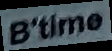

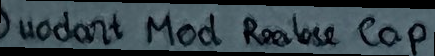

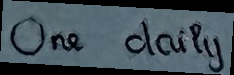

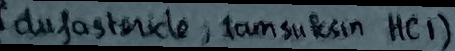

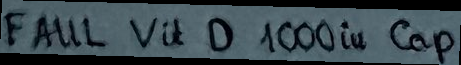

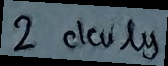

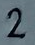

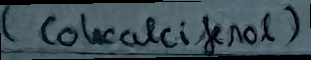

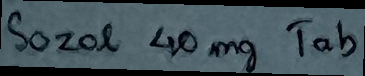

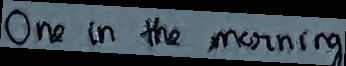

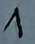

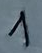

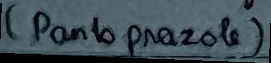

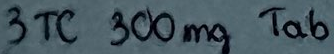

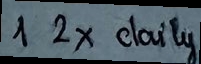

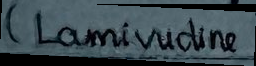

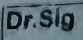

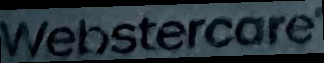

In [7]:
# crop image
boxes = [text['text_region'] for text in result[0]['res']]
box = np.array(boxes).astype(np.int32).reshape(-1, 2)
height = img.shape[0]
width = img.shape[1]

mask = np.zeros((height, width), dtype=np.uint8)
for boxs in boxes:
    box=np.array(boxs).astype(np.int32).reshape(-1, 2)
    points = np.array([box])
    cv2.fillPoly(mask, points, (255))
    res = cv2.bitwise_and(img, img, mask=mask)
    rect = cv2.boundingRect(points) # returns (x,y,w,h) of the rect
    cropped = res[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]
    cropped = Image.fromarray(cropped)
    display(cropped)


In [13]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

In [19]:
IMG = 'image/test.png'    # 1, 2, 3
LANG = 'en'
# You can use only one of these two
# You HABE TO train the CTC model by yourself using word_classifier_CTC.ipynb
MODEL_LOC_CHARS = f'models/char-clas/{LANG}/CharClassifier'
MODEL_LOC_CTC = 'models/word-clas/CTC/Classifier1'

In [20]:
CHARACTER_MODEL = Model(MODEL_LOC_CHARS)
CTC_MODEL = Model(MODEL_LOC_CTC, 'word_prediction')

OSError: ignored

In [21]:
def recognise(img):
    """Recognition using character model"""
    # Pre-processing the word
    img = word_normalization(
        img,
        60,
        border=False,
        tilt=True,
        hyst_norm=True)
    display(img)
recognise('image/test.png')

#     # Separate letters
#     img = cv2.copyMakeBorder(
#         img,
#         0, 0, 30, 30,
#         cv2.BORDER_CONSTANT,
#         value=[0, 0, 0])
#     gaps = characters.segment(img, RNN=True)

#     chars = []
#     for i in range(len(gaps)-1):
#         char = img[:, gaps[i]:gaps[i+1]]
#         char, dim = letter_normalization(char, is_thresh=True, dim=True)
#         # TODO Test different values
#         if dim[0] > 4 and dim[1] > 4:
#             chars.append(char.flatten())

#     chars = np.array(chars)
#     word = ''
#     if len(chars) != 0:
#         pred = CHARACTER_MODEL.run(chars)
#         for c in pred:
#             word += idx2char(c)

#     return word

# implt(crop)
# for line in lines:
#     print(" ".join([recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))

AttributeError: ignored